## Intro
Goal of this notebook is to extract an airport signage from a typical jpg image file.

At this point we are not interested in reading the sign.

For this purpose we are going go use cv2 library, and numpy and matplotlib for some administrative work.

In [45]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
# List files in the directory
os.listdir()

['.DS_Store',
 'output2.jpg',
 'sign_recognition.ipynb',
 'IMG_5703.jpg',
 'output.jpg',
 '.ipynb_checkpoints']

In [140]:
# function to load/reload defined image
def reload_image():
    file_name="IMG_5703.jpg"
    image=cv2.imread(file_name)
    rgb_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image,rgb_image
image,rgb_image=reload_image()

rgb_image.shape
# ---> image is a 3-dim array of shape 1024, 768, 3

(1024, 768, 3)

In [8]:
# transform to greyscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

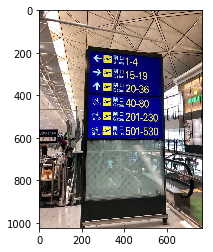

In [9]:
#Show the image with matplotlib (need to use the rgb standard)
plt.imshow(rgb_image)
plt.show()

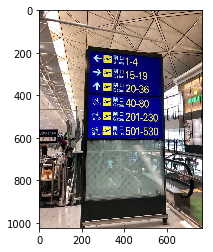

In [10]:
file_name_test="IMG_5703.jpg"
# function for loading and printing an image from file
def load_and_print_image(filename):
    image=cv2.imread(filename)
    rgb_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_image)
    plt.show()
    cv2.destroyAllWindows()
    return None
load_and_print_image(file_name_test)

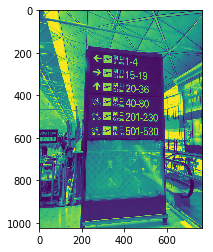

In [13]:
#Show the image with matplotlib
# way to avoid strange colormap
# plt.imshow(bw_img,cmap='Greys_r')
plt.imshow(image_gray)
plt.show()

In [125]:
low=20 # 20 seems to be a good value for which the sign is recognized
# -> means the brightness/darkness after which everything is cast to the extreme end

# use binary tresholding - 
_, th1 = cv2.threshold(image_gray, low, 255, cv2.THRESH_BINARY)

# other ways to treshold
# these were tried but not used, since they did not yield any improvment on our task
th2 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

_, contours, _ = cv2.findContours(th1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


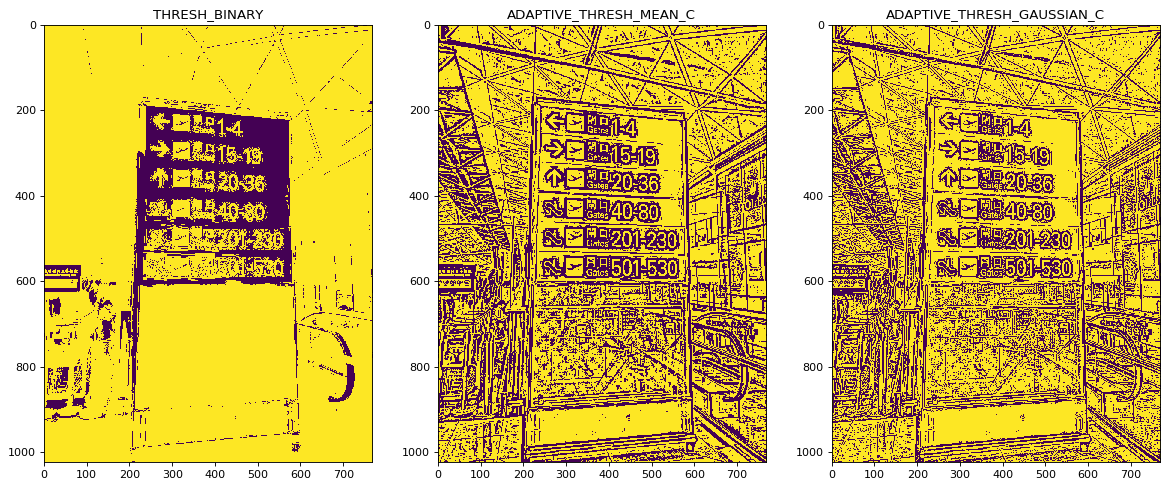

In [126]:
thresholds=[th1,th2,th3]
models=["THRESH_BINARY","ADAPTIVE_THRESH_MEAN_C","ADAPTIVE_THRESH_GAUSSIAN_C"]
i=0

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
for th in thresholds:
    i=i+1
    plt.subplot(1,3,i)
    plt.imshow(th)
    plt.title(models[i-1])
plt.show()

## Treshold and model selection
Seems like in this case having more complex model does not bring any further value - maybe in more complicated modelling yes - they seem to be able to pinpoint numbers and text quite well

In [137]:
# reload image to be certain there are no old annotations
image,rgb_image=reload_image()
rgb_image2=rgb_image
rgb_image3=rgb_image

# contour areas
cnt_areas=[]
rectangles=[]
approxs=[]
for cnt in contours:
    # approxPolyDP gives approximate polygonal curves, with error length specified
    approx = cv2.approxPolyDP(cnt, 0.2*cv2.arcLength(cnt, True), True)
    cv2.drawContours(rgb_image, [approx], 0, (0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1]
    
    cnt_areas.append(cv2.contourArea(cnt))   
    # if the length is 4 then we have a rectangle
    if len(approx)==4:
        rectangles.append(1)
    else:
        rectangles.append(0)
    approxs.append(approx)

# get contour areas and sort by size
cnt_sorted=sorted(cnt_areas,reverse=True)
index=np.argsort(cnt_areas)

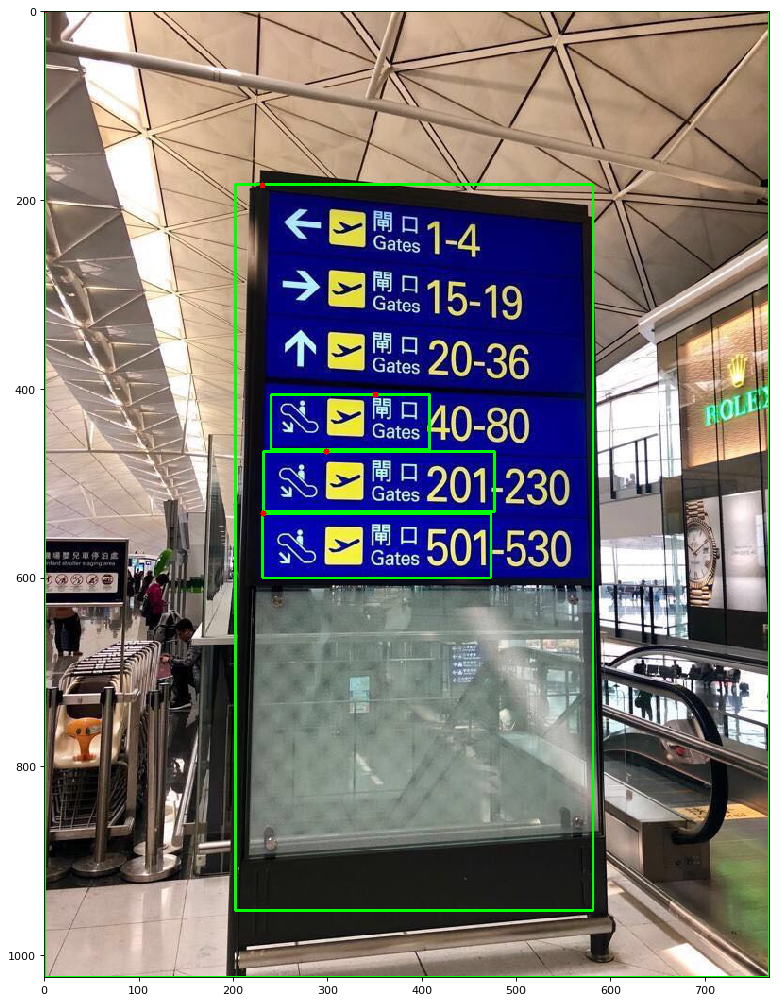

In [139]:
# find the contour with largest area
image,rgb_image=reload_image()
rgb_image2=rgb_image
rgb_image3=rgb_image

# plot the largest 5 rectangles to the image
# -> we can quite clearly see that the largest one is always the entire image
for cnt_index in index[-5:]:
    x,y,w,h = cv2.boundingRect(contours[cnt_index])
    cv2.rectangle(rgb_image2,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.drawContours(rgb_image3, contours[cnt_index], 0, (255,0,0), 5)

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(rgb_image3)
cv2.imwrite('output_w_rectangles.jpg',cv2.cvtColor(rgb_image3, cv2.COLOR_RGB2BGR))

plt.show()

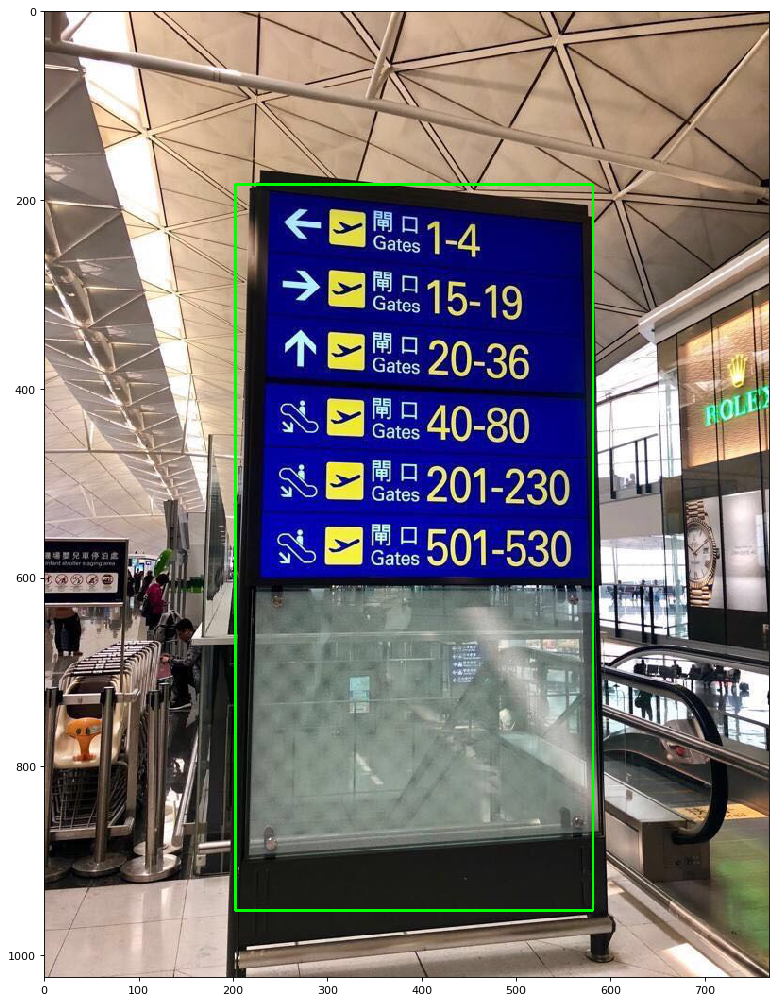

In [148]:
# Here we can get the second largest shape

# a better way to solve the problem would be probably to make the contrasting according
# to the blue colour - that is only present in the 
image,rgb_image=reload_image()
def find_second_largest_shape(image,rgb_image):
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    low=20 # 20 seems to be a good value for which the sign is recognized
    _, th1 = cv2.threshold(image_gray, low, 255, cv2.THRESH_BINARY)
    _, contours, _ = cv2.findContours(th1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    cnt_areas=[]
    for cnt in contours:
        cnt_areas.append(cv2.contourArea(cnt))   
    cnt_sorted=sorted(cnt_areas,reverse=True)
    index=np.argsort(cnt_areas)
    
    # index for the second largest shape
    second_largest=index[-2]
    
    x,y,w,h = cv2.boundingRect(contours[second_largest])
    cv2.rectangle(rgb_image,(x,y),(x+w,y+h),(0,255,0),2)
    
    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    
    plt.imshow(rgb_image)
    cv2.imwrite('rectangled_sign.jpg',cv2.cvtColor(rgb_image, cv2.COLOR_RGB2BGR))
    plt.show()
    return None

find_second_largest_shape(image,rgb_image)

